In [1]:
from MultiLabelEvolvingSNN import *
import arff
import warnings
from scipy.io import loadmat
warnings.filterwarnings("ignore")
%matplotlib inline
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')

## Load Data and Convert to Spikes

In [2]:
train_path = '../datasets/foodtruck/foodtruck-rand-hout-tra.arff'
test_path = '../datasets/foodtruck/foodtruck-rand-hout-tst.arff'
num_features = 21

train_data = arff.load(open(train_path, 'rt'))
col_names = [x[0] for x in train_data['attributes']]
train_data_arr = np.array(train_data['data'])
train_data_arr = np.vstack([np.array(col_names), train_data_arr])
np.savetxt('../datasets/foodtruck/train.csv', train_data_arr, fmt='%s', delimiter=',')
train_df = pd.read_csv('../datasets/foodtruck/train.csv')
train_df['time'].replace(['lunch', 'afternoon', 'happy_hour', 'dinner', 'dawn'], [0, 1, 2, 3, 4], inplace=True)
train_df['motivation'].replace(['ads', 'by_chance', 'friend', 'social_network', 'web'], [0, 1, 2, 3, 4], inplace=True)
train_df['marital.status'].replace(['divorced', 'married', 'single'], [0, 1, 2], inplace=True)
train_df['gender'].replace(['F', 'M'], [0, 1], inplace=True)
for c in train_df.columns:
    train_df[c] = train_df[c].astype('float')
train_data = train_df.to_numpy()

test_data = arff.load(open(test_path, 'rt'))
col_names = [x[0] for x in test_data['attributes']]
test_data_arr = np.array(test_data['data'])
test_data_arr = np.vstack([np.array(col_names), test_data_arr])
np.savetxt('../datasets/foodtruck/test.csv', train_data_arr, fmt='%s', delimiter=',')
test_df = pd.read_csv('../datasets/foodtruck/test.csv')
test_df['time'].replace(['lunch', 'afternoon', 'happy_hour', 'dinner', 'dawn'], [0, 1, 2, 3, 4], inplace=True)
test_df['motivation'].replace(['ads', 'by_chance', 'friend', 'social_network', 'web'], [0, 1, 2, 3, 4], inplace=True)
test_df['marital.status'].replace(['divorced', 'married', 'single'], [0, 1, 2], inplace=True)
test_df['gender'].replace(['F', 'M'], [0, 1], inplace=True)
for c in test_df.columns:
    test_df[c] = test_df[c].astype('float')
test_data = test_df.to_numpy()

print("Before converting to spikes: ")
print("Train data shape: ", train_data.shape)
print("Test data shape: ", test_data.shape)

a = train_data[:, :num_features].max(axis=0)
b = train_data[:, :num_features].min(axis=0)

train_spikes, train_labels = encode_data_to_spikes(train_data, device, num_features, a, b)
test_spikes, test_labels = encode_data_to_spikes(test_data, device, num_features, a, b)
print("Train data shape: ", np.array(train_spikes).shape)
print("Train labels shape: ", np.array(train_labels).shape)
print("Test data shape: ", np.array(test_spikes).shape)
print("Test labels shape: ", np.array(test_labels).shape)

Before converting to spikes: 
Train data shape:  (250, 33)
Test data shape:  (250, 33)


100%|██████████| 250/250 [00:00<00:00, 7760.73it/s]

Train data shape:  (250, 1, 126)
Train labels shape:  (250, 12)
Test data shape:  (250, 1, 126)
Test labels shape:  (250, 12)


## SNN

  0%|          | 0/5000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 9, class 0 neurons = 7
Class 1, class 1 neurons = 3, class 0 neurons = 11
Class 2, class 1 neurons = 3, class 0 neurons = 13
Class 3, class 1 neurons = 8, class 0 neurons = 9
Class 4, class 1 neurons = 4, class 0 neurons = 13
Class 5, class 1 neurons = 2, class 0 neurons = 14
Class 6, class 1 neurons = 5, class 0 neurons = 14
Class 7, class 1 neurons = 5, class 0 neurons = 12
Class 8, class 1 neurons = 6, class 0 neurons = 12
Class 9, class 1 neurons = 4, class 0 neurons = 13
Class 10, class 1 neurons = 6, class 0 neurons = 12
Class 11, class 1 neurons = 6, class 0 neurons = 12


 10%|█         | 500/5000 [2:26:55<21:58:22, 17.58s/it]

Epoch number: 500
Train Precision: 0.8512, Test Precision: 0.8512
Train Recall: 0.6489, Test Recall: 0.6489
Train F1: 0.7364, Test F1: 0.7364
Max. train classwise accuracy for is 0.9760
Min. train classwise accuracy for is 0.8360
Max. test classwise accuracy for is 0.9760
Min. test classwise accuracy for is 0.8360


 20%|██        | 1000/5000 [4:53:32<19:31:31, 17.57s/it]

Epoch number: 1000
Train Precision: 0.8916, Test Precision: 0.8916
Train Recall: 0.7145, Test Recall: 0.7145
Train F1: 0.7933, Test F1: 0.7933
Max. train classwise accuracy for is 0.9840
Min. train classwise accuracy for is 0.8760
Max. test classwise accuracy for is 0.9840
Min. test classwise accuracy for is 0.8760


 30%|███       | 1500/5000 [7:20:02<17:04:40, 17.57s/it]

Epoch number: 1500
Train Precision: 0.9216, Test Precision: 0.9216
Train Recall: 0.7713, Test Recall: 0.7713
Train F1: 0.8398, Test F1: 0.8398
Max. train classwise accuracy for is 0.9880
Min. train classwise accuracy for is 0.8960
Max. test classwise accuracy for is 0.9880
Min. test classwise accuracy for is 0.8960


 40%|████      | 2000/5000 [9:46:21<14:37:43, 17.55s/it]

Epoch number: 2000
Train Precision: 0.9405, Test Precision: 0.9405
Train Recall: 0.8121, Test Recall: 0.8121
Train F1: 0.8716, Test F1: 0.8716
Max. train classwise accuracy for is 0.9880
Min. train classwise accuracy for is 0.9160
Max. test classwise accuracy for is 0.9880
Min. test classwise accuracy for is 0.9160


 50%|█████     | 2500/5000 [12:12:29<12:10:57, 17.54s/it]

Epoch number: 2500
Train Precision: 0.9554, Test Precision: 0.9554
Train Recall: 0.8351, Test Recall: 0.8351
Train F1: 0.8912, Test F1: 0.8912
Max. train classwise accuracy for is 0.9880
Min. train classwise accuracy for is 0.9320
Max. test classwise accuracy for is 0.9880
Min. test classwise accuracy for is 0.9320


 60%|██████    | 3000/5000 [14:38:08<9:40:22, 17.41s/it] 

Epoch number: 3000
Train Precision: 0.9702, Test Precision: 0.9702
Train Recall: 0.8670, Test Recall: 0.8670
Train F1: 0.9157, Test F1: 0.9157
Max. train classwise accuracy for is 0.9920
Min. train classwise accuracy for is 0.9480
Max. test classwise accuracy for is 0.9920
Min. test classwise accuracy for is 0.9480


 70%|███████   | 3500/5000 [17:03:11<7:12:39, 17.31s/it]

Epoch number: 3500
Train Precision: 0.9765, Test Precision: 0.9765
Train Recall: 0.8848, Test Recall: 0.8848
Train F1: 0.9284, Test F1: 0.9284
Max. train classwise accuracy for is 0.9920
Min. train classwise accuracy for is 0.9520
Max. test classwise accuracy for is 0.9920
Min. test classwise accuracy for is 0.9520


 80%|████████  | 4000/5000 [19:27:16<4:47:42, 17.26s/it]

Epoch number: 4000
Train Precision: 0.9806, Test Precision: 0.9806
Train Recall: 0.8972, Test Recall: 0.8972
Train F1: 0.9370, Test F1: 0.9370
Max. train classwise accuracy for is 0.9920
Min. train classwise accuracy for is 0.9520
Max. test classwise accuracy for is 0.9920
Min. test classwise accuracy for is 0.9520


 90%|█████████ | 4500/5000 [21:50:31<2:22:39, 17.12s/it]

Epoch number: 4500
Train Precision: 0.9830, Test Precision: 0.9830
Train Recall: 0.9238, Test Recall: 0.9238
Train F1: 0.9525, Test F1: 0.9525
Max. train classwise accuracy for is 1.0000
Min. train classwise accuracy for is 0.9640
Max. test classwise accuracy for is 1.0000
Min. test classwise accuracy for is 0.9640


100%|██████████| 5000/5000 [24:11:32<00:00, 17.42s/it]  

Epoch number: 5000
Train Precision: 0.9814, Test Precision: 0.9814
Train Recall: 0.9344, Test Recall: 0.9344
Train F1: 0.9573, Test F1: 0.9573
Max. train classwise accuracy for is 1.0000
Min. train classwise accuracy for is 0.9480
Max. test classwise accuracy for is 1.0000
Min. test classwise accuracy for is 0.9480
Max. Test Precision: 0.9867 at epoch 4355
Test Recall at max. test precision: 0.9238
Test F1 at max. test precision: 0.9542
Train Precision at max. test precision: 0.9867
Train Recall at max. test precision: 0.9238
Train F1 at max. test precision: 0.9542
Max. Test Recall: 0.9362 at epoch 4914
Test Precision at max. test recall: 0.9796
Test F1 at max. test recall: 0.9574
Train Recall at max. test recall: 0.9362
Train Precision at max. test recall: 0.9796
Train F1 at max. test recall: 0.9574
Max. Test F1: 0.9574 at epoch 4914
Test Recall at max. test F1: 0.9362
Test Precision at max. test F1: 0.9796
Train Recall at max. test F1: 0.9362
Train Precision at max. test F1: 0.9796
T

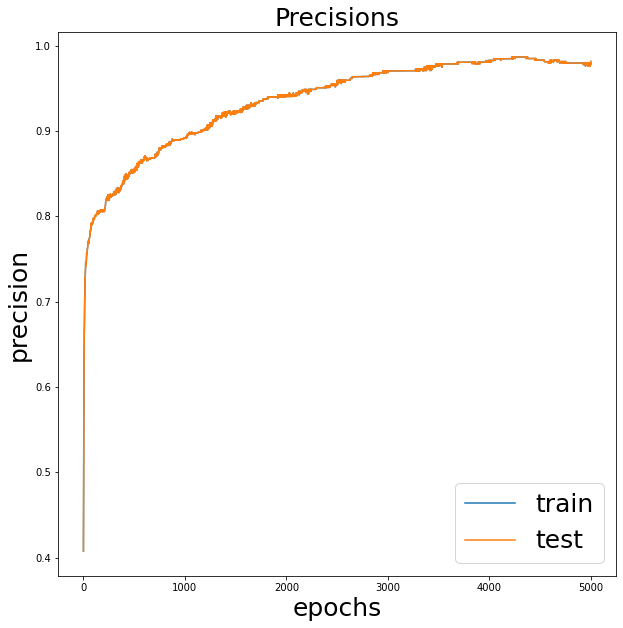

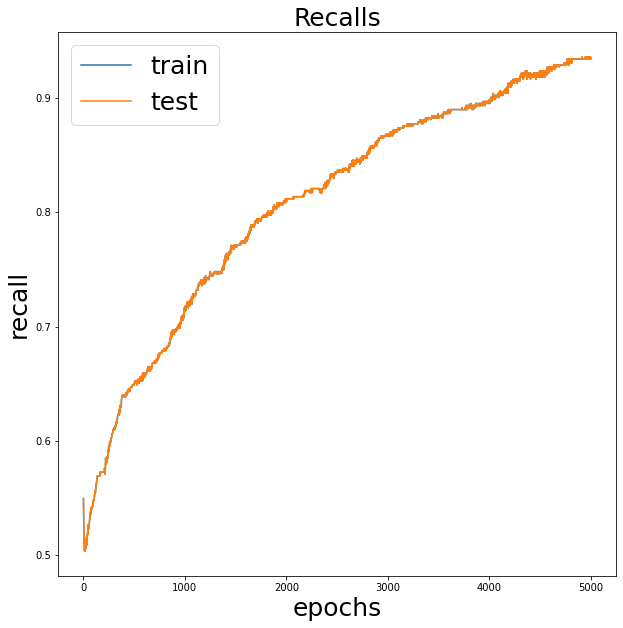

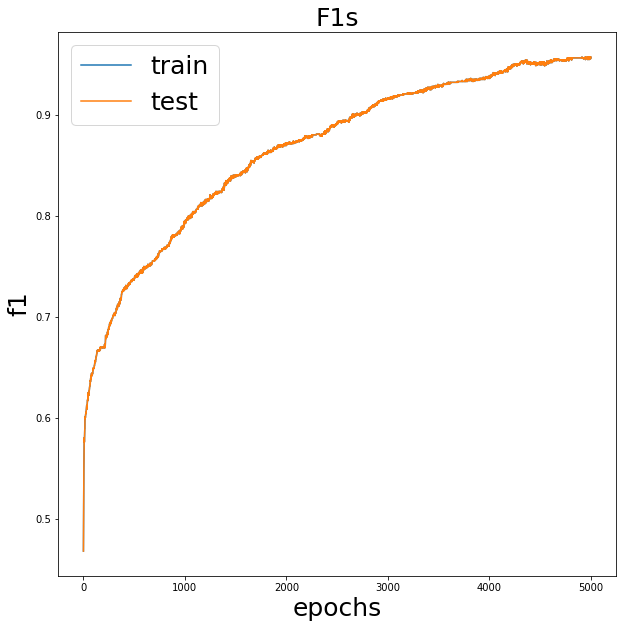

In [3]:
hparams_dict = {
    'inputs': 126,
    'outputs': 12,
    'time_constant': 300,
    'alpha_a': 0.48,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 5e-4,
    'sim_time': 600,
    'n_epochs': 5000,
    'print_every': 500,
    'name': 'Foodtruck',
    'seed': 2,
    'ckpt_dir': './checkpoints/foodtruck',
    'load_from_file': None,
    'device': device
}
net = OverallSNN(hparams_dict)
train_history, test_history = net.fit(train_spikes, train_labels, test_spikes, test_labels)

In [3]:
hparams_dict = {
    'inputs': 126,
    'outputs': 12,
    'time_constant': 300,
    'alpha_a': 0.48,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 5e-4,
    'sim_time': 600,
    'n_epochs': 5000,
    'print_every': 500,
    'name': 'Foodtruck',
    'seed': 2,
    'ckpt_dir': './checkpoints/foodtruck',
    'load_from_file': './checkpoints/foodtruck/best_f1_model0.0005_5000.pkl',
    'device': device
}
net = OverallSNN(hparams_dict)
metrics = Metrics(net, train_spikes, train_labels, test_spikes, test_labels)
metrics.evaluate()

Model was trained on 12 classes
Evaluating Model on train mode
Classwise Results
|                     |        0 |        1 |        2 |        3 |        4 |        5 |        6 |   7 |        8 |         9 |        10 |        11 |
|:--------------------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|----:|---------:|----------:|----------:|----------:|
| class               | 1        | 2        | 3        | 4        | 5        | 6        | 7        |   8 | 9        | 10        | 11        | 12        |
| accuracy            | 0.98     | 0.948    | 0.976    | 0.988    | 0.98     | 0.992    | 0.996    |   1 | 0.996    |  0.988    |  0.984    |  0.984    |
| hamming loss        | 0.02     | 0.052    | 0.024    | 0.012    | 0.02     | 0.008    | 0.004    |   0 | 0.004    |  0.012    |  0.016    |  0.016    |
| zero_one_loss       | 0.02     | 0.052    | 0.024    | 0.012    | 0.02     | 0.008    | 0.004    |   0 | 0.004    |  0.012    |  0.016    |  0.016 